# Hello

# classification_Project_______Bank Personal Loan

This is the case of a bank (Thera Bank) whose management wants to explore ways to convert its commitment customers 
to personal loan customers (while retaining them as depositors). A campaign that the bank ran for debt customers last year
showed a healthy conversion rate of over 9%. This encourages the retail marketing department to design better 
targeted marketing campaigns to increase the success ratio with minimal budget.

Target : Personal Loan

age : سن طرف

Experience : سابقه کار

Income : حقوقش

ZIP Code: کد پستی (به منطقه زندگیش اشاره داره)

Family: خانوادش چند نفرس

CCAvg: میانگین استفاده از کارتش

Education: تحصیلاتش

Mortgage: ارزش خونه ای که توش زندگی میکنه؟

Personal Loan: وام میخواد یا نه؟

Securities Account: آیا اکانت محافظت شده داره تو بانک یا نه؟

CD Account: اکانت سی دی داره یا نه (این چه گوهیه دیگه نمیدونم)

Online: آیا از امکانات ایرنتی اکانتش استفاده میکنه؟

CreditCard: آیا کارت کردیت داره یا نه

**********************************************************************************************

Data Description:

Dependent variable is the Personal_loan which is of categorical data type.
Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
There were no missing values in the dataset.

# 2. Import Libraries & Dataset

In [418]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_classif

In [419]:
# import requirement sklearn functions
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [420]:
# import bank_personal_loan dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# 3. Overview of Dataset

In [421]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [422]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


*********************************************

# get the size of dataframe

In [423]:
# number of rows/observations
print ("Rows     : " , df.shape[0])  

# number of columns
print ("Columns  : " , df.shape[1]) 

#get name of columns/features
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) 

print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
# looking at columns with most Missing Values

print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) 
#  count of unique values
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  


Rows     :  5000
Columns  :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
Percent of missing :

 ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Secur

There are no missing values in the dataset.
All the columns are numerical here. Personal loan is target variable.
Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

In [424]:
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
237,238,62,38,83,92521,1,1.8,3,0,0,0,0,1,0
3834,3835,48,22,28,94720,1,1.4,3,75,0,0,0,1,0
3407,3408,58,32,19,90405,4,0.7,3,0,0,0,0,0,0
394,395,33,9,80,91311,4,3.4,1,0,0,0,0,1,1
1427,1428,31,5,85,95828,2,1.3,1,119,0,0,0,1,1
3478,3479,31,6,133,95747,1,1.5,3,0,1,0,0,0,0
1199,1200,29,4,62,92064,2,2.5,1,184,0,0,0,1,0
925,926,42,18,31,94720,1,0.3,3,0,0,0,0,0,1
1489,1490,62,38,99,91604,4,1.7,2,0,0,0,0,0,0
4732,4733,39,13,69,92096,3,0.1,1,247,0,0,0,0,0


Id column is not needed and can be dropped.

information about dataset:
    _Dataset has 14 columns including:
        13 columns by int64 type: ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, Securities Account, CD Account, Online and CreditCard
        1 column by object type: CCAvg
    _Dataset has 5000 datapoints.
    _Target is Personal Loan column and other columns are features.
    _Target Variable:
        is Personal Loan column and other columns are features.
    _It seems that there is no missing value, but there may be invalid values, so we will check this case further.
    

#  Cleaning Dataset

The first thing we need to do :
    It seems that the / sign in column CCAvg represents a decimal. 
    Therefore, we first correct the CCAvg column by replace . instead of / and then convert type of CCAvg to float64:

In [425]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [426]:
# df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
# df

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


information about dataset: _Dataset has 14 columns including: 
13 columns by int64 type: ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, 
Securities Account, CD Account, Online and CreditCard 1 column by object type: 
CCAvg _Dataset has 5000 datapoints. _Target is Personal Loan column and other columns are features. 
Target Variable: is Personal Loan column and other columns are features. 
_It seems that there is no missing value, but there may be invalid values, so we will check this case further.

In [428]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


It seems that we have a negative value in the Experience column, which is illogical,
so since we do not have access to the owner of the data, we assume that the negative data was actually positive,
so we convert the negative numbers into positive ones.

In [429]:
data['Experience'][data['Experience'] < 0] = data['Experience'].mean()
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.328688,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253009,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.104600,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [430]:
# check missing values
df.isna().sum().to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


graet. No missing values. Let's continuous to check invalid values

In [431]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 47 unique value
Income has 162 unique value
ZIP Code has 467 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [432]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
Education:
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
Personal Loan:
0    4520
1     480
Name: Personal Loan, dtype: int64
--------------------------------------------------
Securities Account:
0    4478
1     522
Name: Securities Account, dtype: int64
--------------------------------------------------
CD Account:
0    4698
1     302
Name: CD Account, dtype: int64
--------------------------------------------------
Online:
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
CreditCard:
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


OK. According to above results and type of columnsو We conclude that there are no invalid values.

In [433]:
# now check duplicated data
df.duplicated().sum()

0

good, there is no duplicate data

In [434]:
zipco= df.sort_values('ZIP Code')
zipco

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25.0,21,9307,4,0.60,3,0,0,0,0,1,1
652,653,34,9.0,92,90005,1,2.80,1,0,0,0,0,1,0
1619,1620,45,21.0,29,90005,1,0.30,3,0,0,0,0,1,0
1681,1682,32,8.0,141,90005,2,4.33,1,0,0,0,0,0,0
4186,4187,33,9.0,10,90005,4,1.00,1,81,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,3526,59,34.0,13,96651,4,0.90,2,0,0,0,0,0,0
1426,1427,37,11.0,60,96651,3,0.50,3,0,0,0,0,1,0
2731,2732,29,5.0,28,96651,1,0.20,3,0,0,0,0,1,0
672,673,51,27.0,23,96651,1,0.20,1,0,0,0,0,1,0


In [435]:
zipnoise = df[df['ZIP Code'] == 9307]
df.drop(zipnoise.index,inplace=True)

# Heat map Correlation of Attributes

found that the most correlated features on Personal Loan is:

Income
CCAvg
CD Account

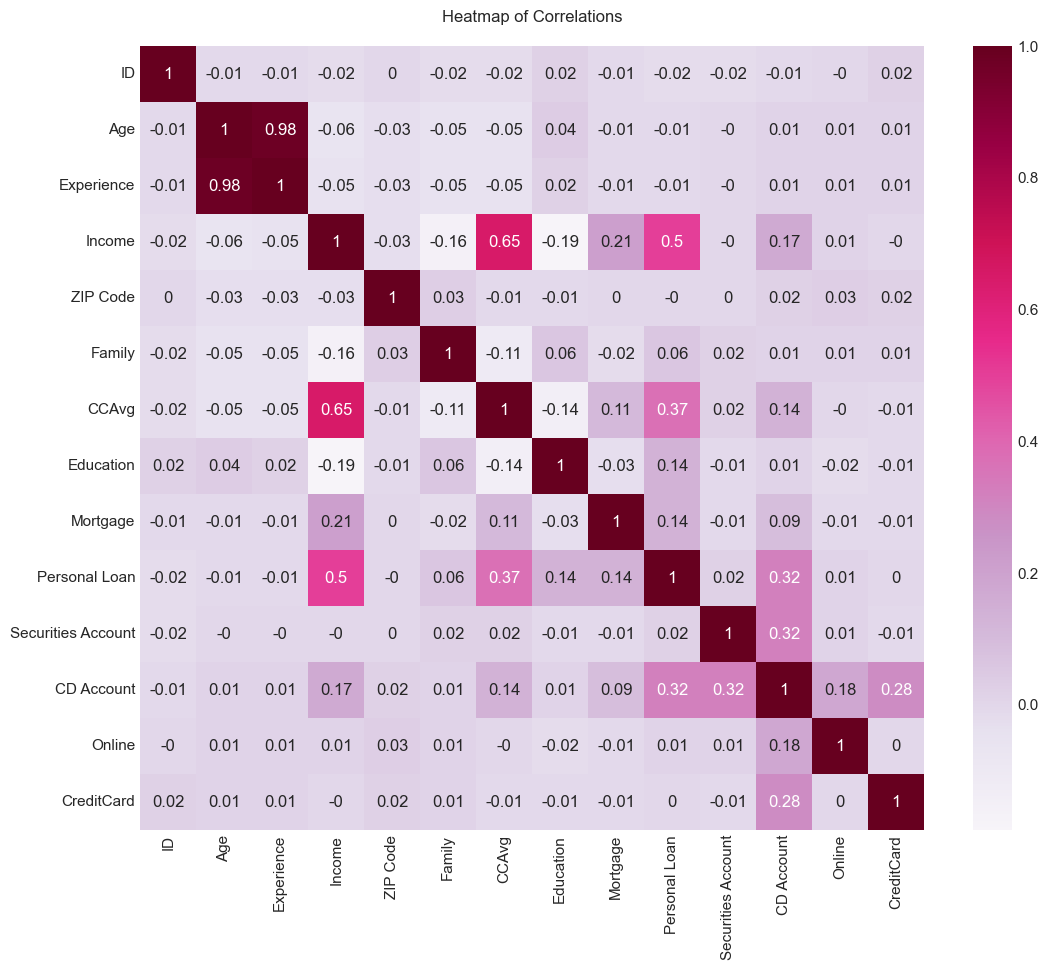

In [436]:
# draw heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), cmap='PuRd', annot=True)
plt.title('Heatmap of Correlations', y=1.02)
plt.show()

'Age' and 'Experience' are correlated with each other.

'Income' and ‘ann_CCAvg' correlated with each other.

'CD Account' has a correlation with 'Credit Card', 'Securities Account', 'Online', ‘ann_CCAvg' and 'Income'.

'Personal Loan' has correlation with 'Income’, ann_'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

'Mortgage' has moderate correlation with 'Income'

'Income' influences ‘ann_CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

# Noies

now check outliers and noisy data. For this step we use scatter plot and box plot

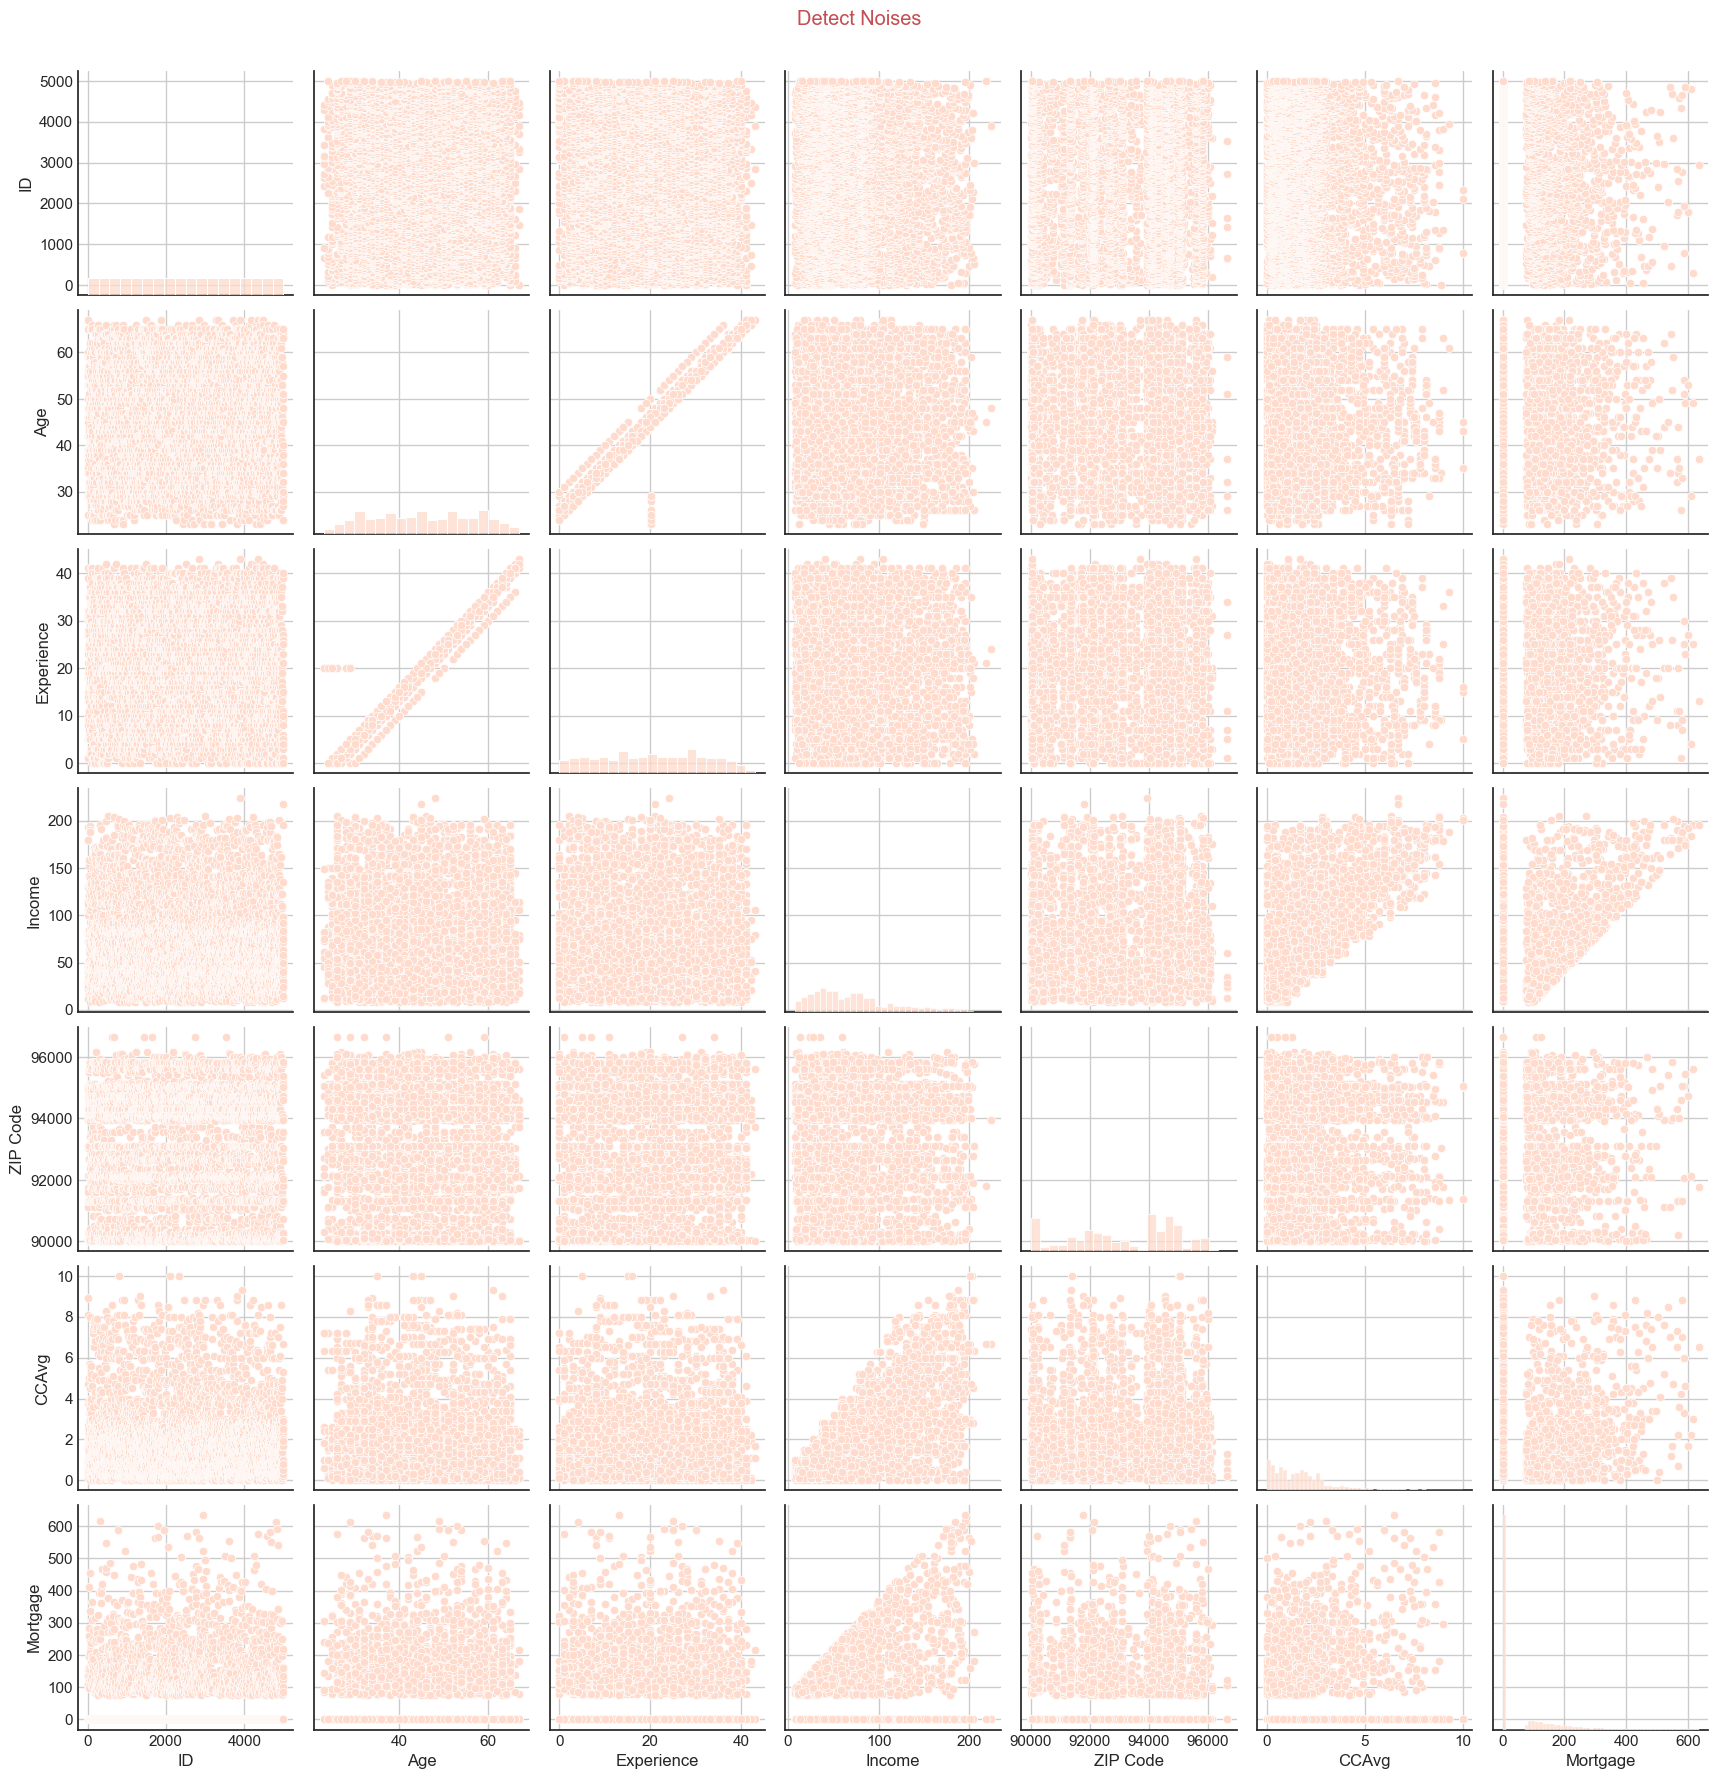

In [437]:
# check noisy data
%matplotlib inline
sns.set_palette('Reds')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noises' , y=1.02   , color="r")

plt.show()

# Univariate Analysis

In [438]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle( Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="pink",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='red',ax=ax_dis)
    ax_dis.axvline(mean, color='b', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

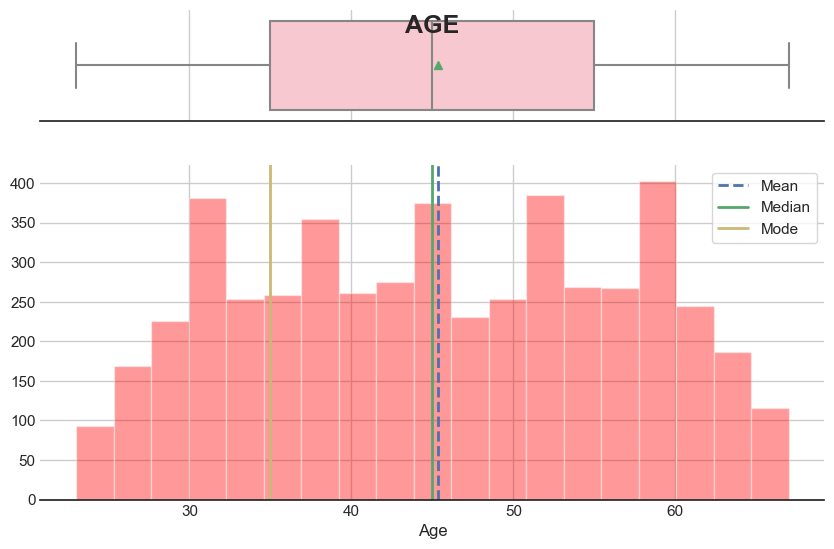

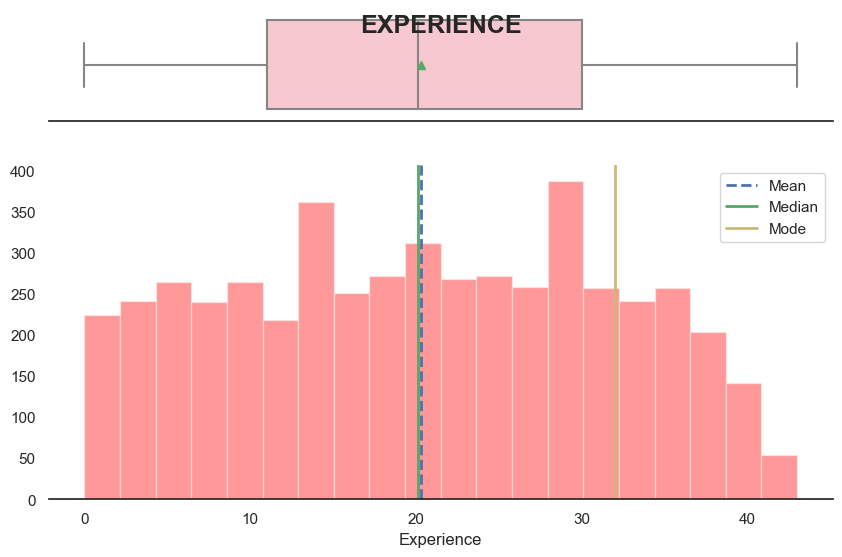

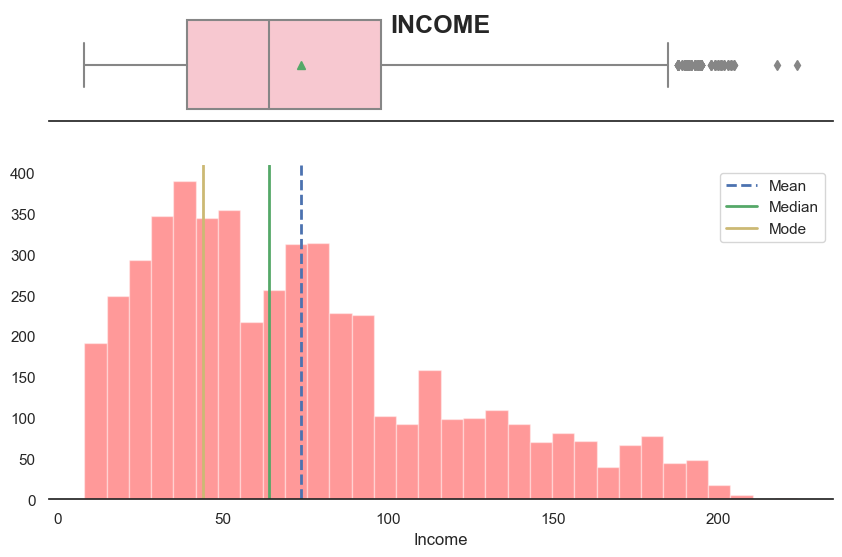

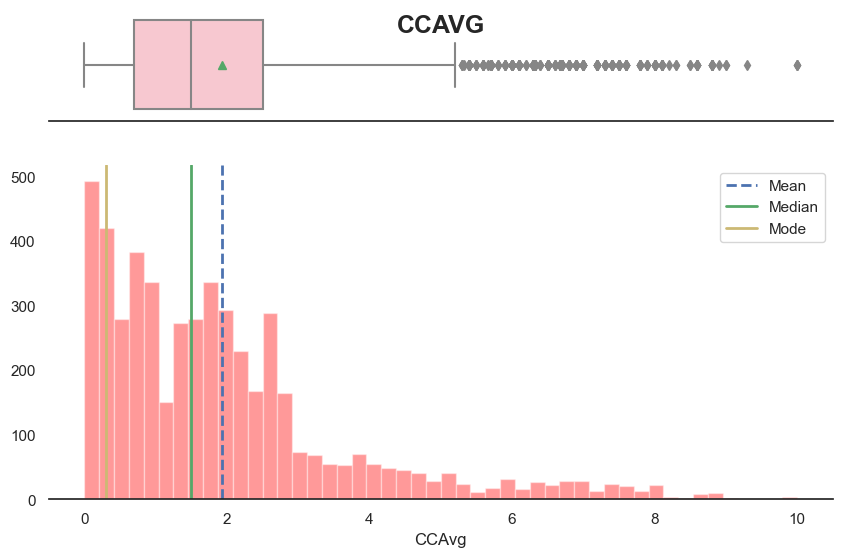

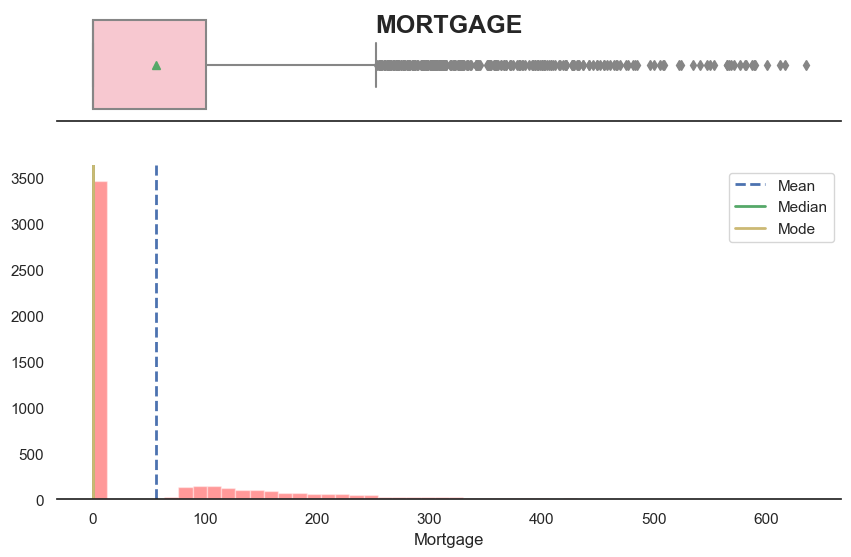

In [439]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

Age and experience both has same distrubtion with spike at 5 points.
Income is right skewed and has some outlier on higher side which can be clipped.
Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped.

# Data Visualization

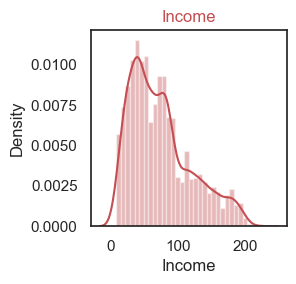

In [440]:
sns.distplot(df['Income'] , color="r")
plt.title('Income' , color='r');

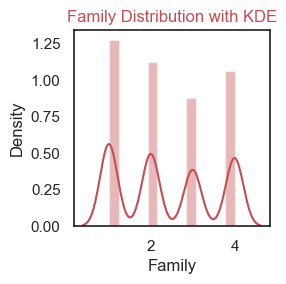

In [441]:
sns.distplot(df['Family'] , color='r')
plt.title('Family Distribution with KDE' , color='r');

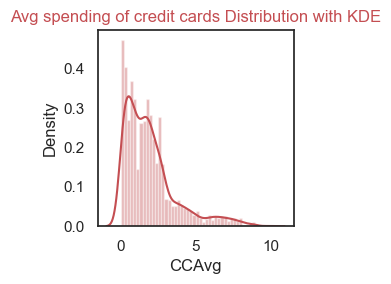

In [442]:
sns.distplot(df['CCAvg'] , color='r')
plt.title('Avg spending of credit cards Distribution with KDE' ,color='r');

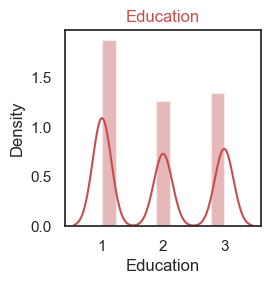

In [443]:
sns.distplot(df['Education'] ,  color='r')
plt.title('Education' ,  color='r');

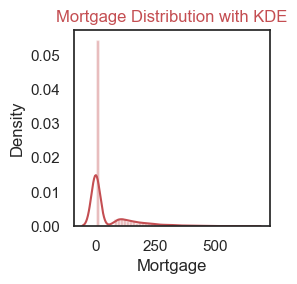

In [444]:
sns.distplot(df['Mortgage'] ,  color='r')
plt.title('Mortgage Distribution with KDE' ,  color='r');

<AxesSubplot: xlabel='Income', ylabel='Density'>

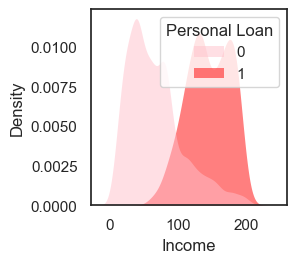

In [445]:
sns.set_palette(['pink','red'])
sns.kdeplot(
   data=df, x='Income', hue="Personal Loan",
   fill=True, common_norm=False, 
   alpha=.5, linewidth=0,
)

found that Personal Loan is more likely to happend when the Income increases.***

The Income of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose monthly Income is more than 8 thousand dollars have accepted a bank loan 

<AxesSubplot: xlabel='Family', ylabel='Density'>

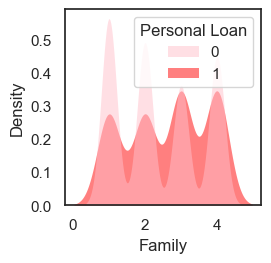

In [446]:
sns.set_palette(['pink','red'])
sns.kdeplot(
   data=df, x='Family', hue="Personal Loan",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

*** found that Personal Loan is more likely to be achieved when the Family members are bigger.***

<AxesSubplot: xlabel='CCAvg', ylabel='Density'>

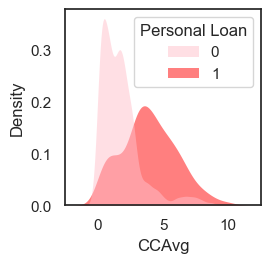

In [447]:
sns.set_palette(['pink','red'])
sns.kdeplot(
   data=df, x='CCAvg', hue="Personal Loan",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

found that Personal Loan is more likely to happend when the Credit Card Average of spending is higher.***

also The CCAvg of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose CCAvg is more than 3 thousand dollars have accepted a bank loan 

<AxesSubplot: xlabel='Education', ylabel='Density'>

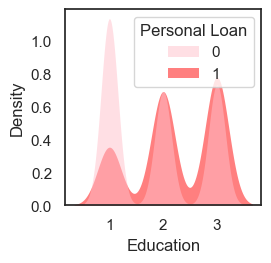

In [448]:
sns.set_palette(['pink','red'])
sns.kdeplot(
   data=df, x='Education', hue="Personal Loan",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

 found that Personal Loan is more likely to happend when the Eduacation level is higher.***

<AxesSubplot: xlabel='Mortgage', ylabel='Density'>

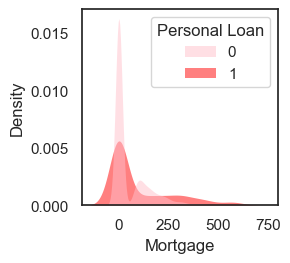

In [449]:
sns.set_palette(['pink','red'])
sns.kdeplot(
   data=df, x='Mortgage', hue="Personal Loan",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
) 

 found that Personal Loan is more likely to happend when the Mortagage equal 0.  ***

In [450]:
loan_acceptance_count = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
loan_acceptance_count.columns = ['Labels', 'Personal Loan']
loan_acceptance_count

,Labels,Personal Loan
0,0,4519
1,1,480


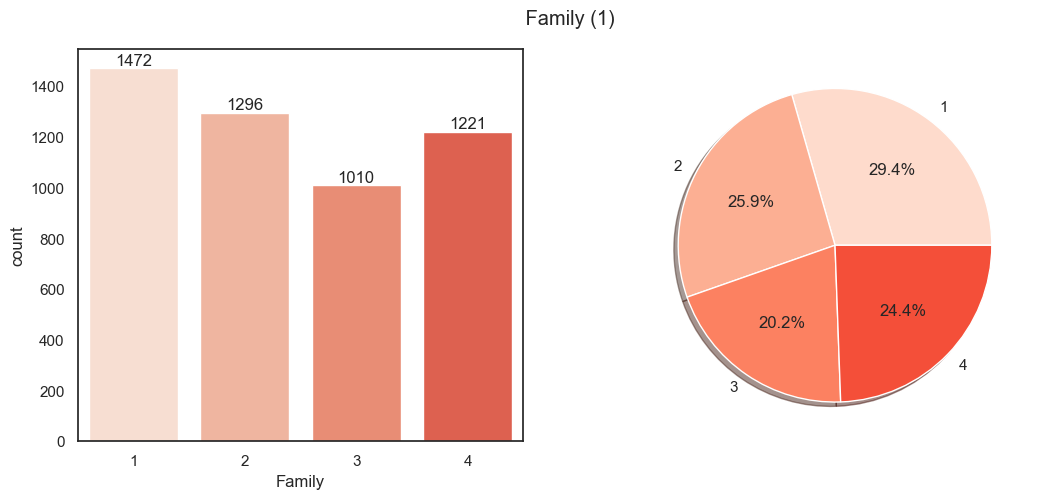

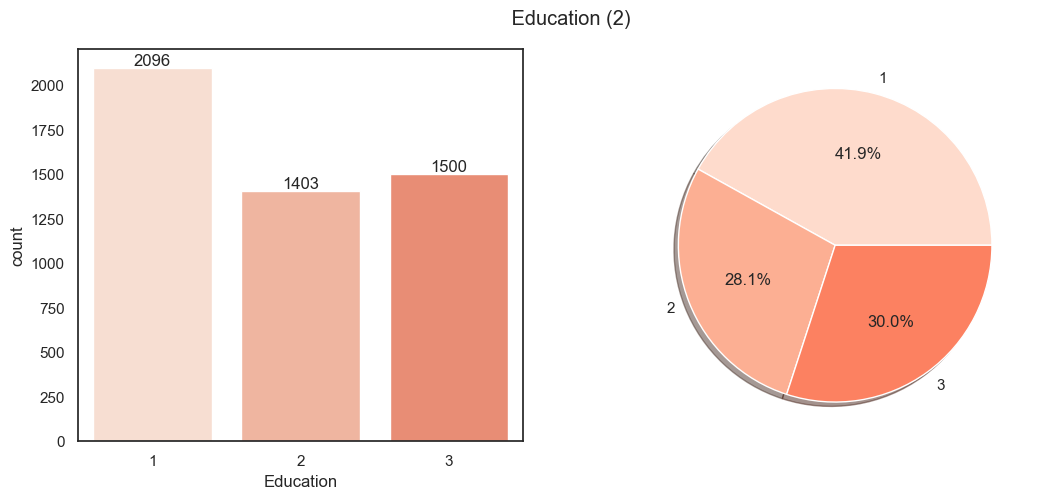

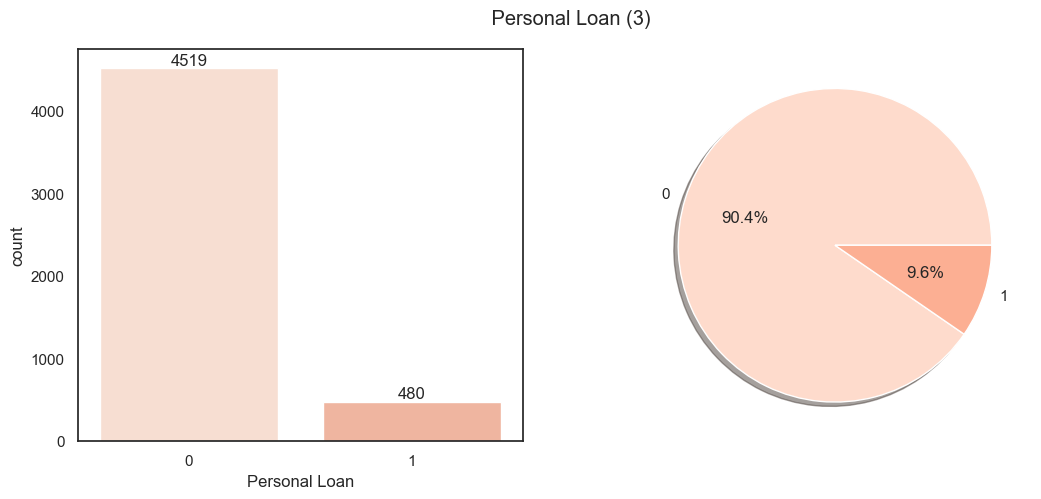

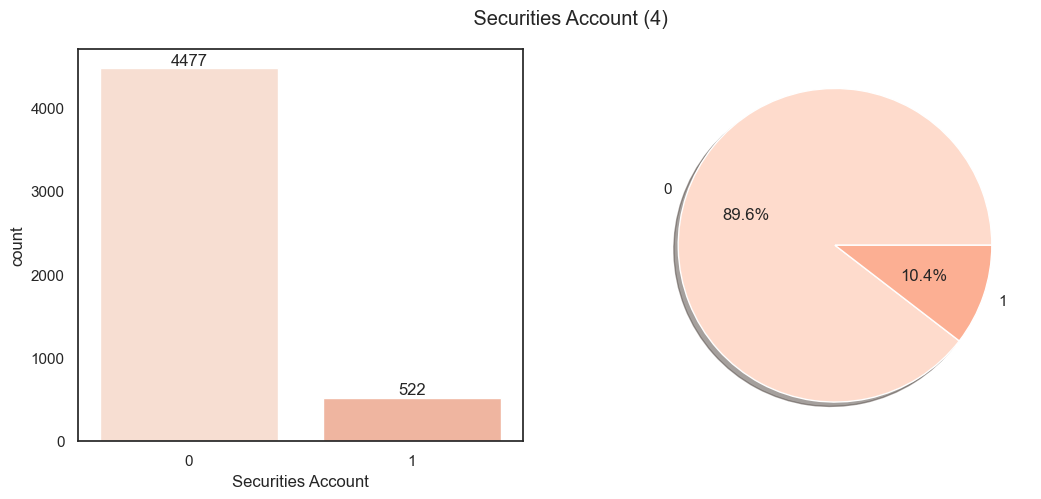

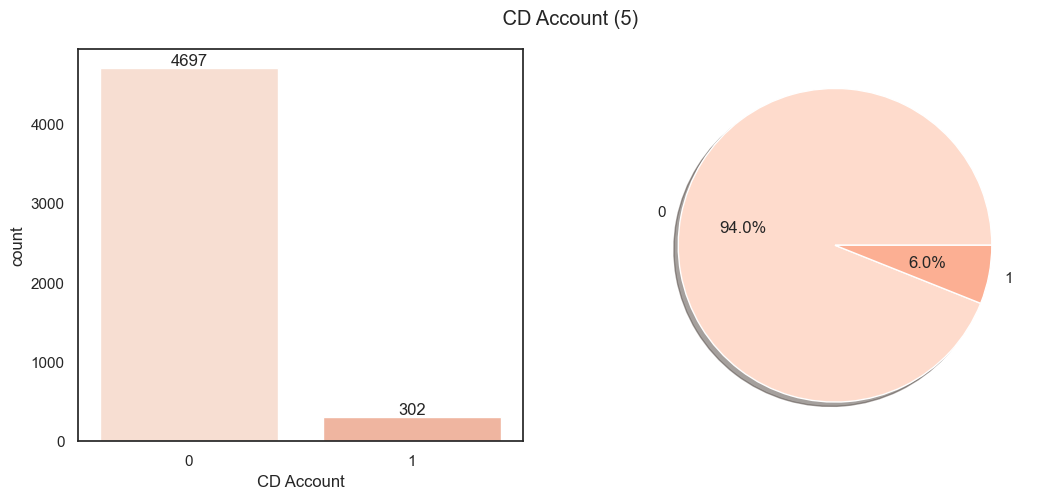

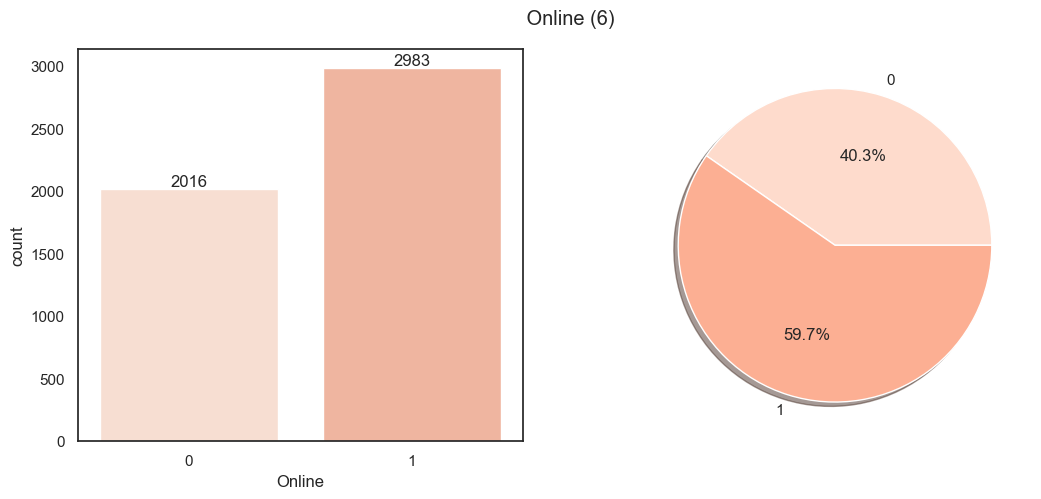

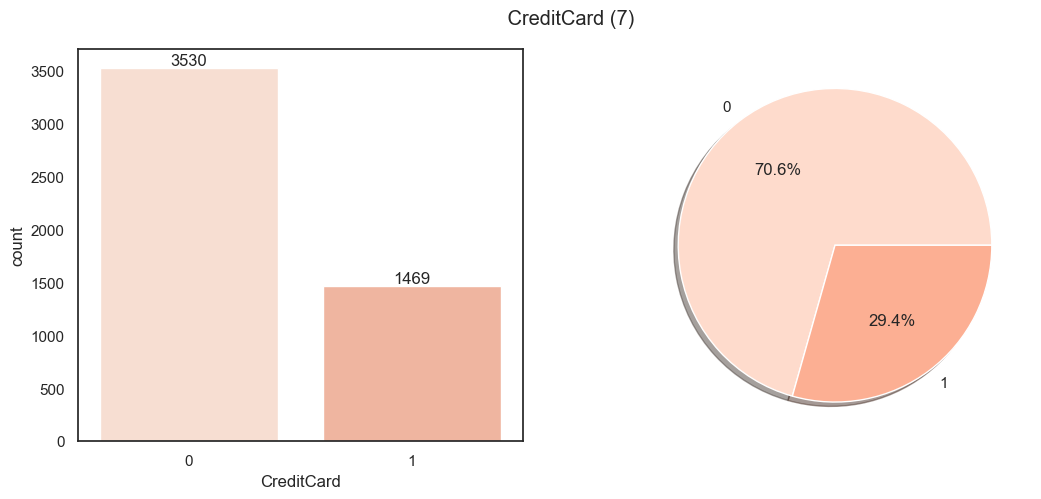

In [451]:
# univariate analysis of categorical data:
sns.set_palette("Reds")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f' {col} ({i+1})', y=1.09)
    plt.show()

Customers with the number of Family 1 and the number of Family 3 respectively have the highest frequency and 

the lowest frequency, but in general, the customers with the number of Family 1, 2, 3, and 4 are almost equally

distributed in the dataset (1).

The customers who did not accept a Personal Loan are much more than the customers who accepted a Personal Loan,

and therefore there is an imbalance in the classes, so we must be careful to consider the imbalance in the model section
for resampling the data.
Most of the bank's customers have education level 1 i.e. Undergrad (2).

Most of the bank's customers (90.4%) did not accept the personal loan offer (3).

Most of the bank's customers (89.6%) did not have a Securities Account (4).

Most of the bank's customers (94%) did not have a CD Account (5).

Most of the bank's customers (59.7%) used internet banking facilities (6).

Most of the bank's customers (70.6%) did not use a credit card issued by Universal Bank(7).

The Age range of customers is between 23 and 67 years. The average age of customers is almost 45.

The Experience range of customers is between 0 and 43 years. The mean age of customers is almost 20.

The age and experience columns have a similar distribution. Also, the column of income, mortgage and average 

distribution are almost similar, all of them are skewed to the right.

The average income of the bank's customers per month is approximately 6 thousand dollars and its range is between 0.67

and 18.67 thousand dollars. CCAvg of the bank's customers per month is approximately 1.94 thousand dollars and its

range is between 0 and 10 thousand dollars.
The average Mortgage of the bank's customers is approximately 56 thousand dollars and its range is between 0 and 635
thousand dollars

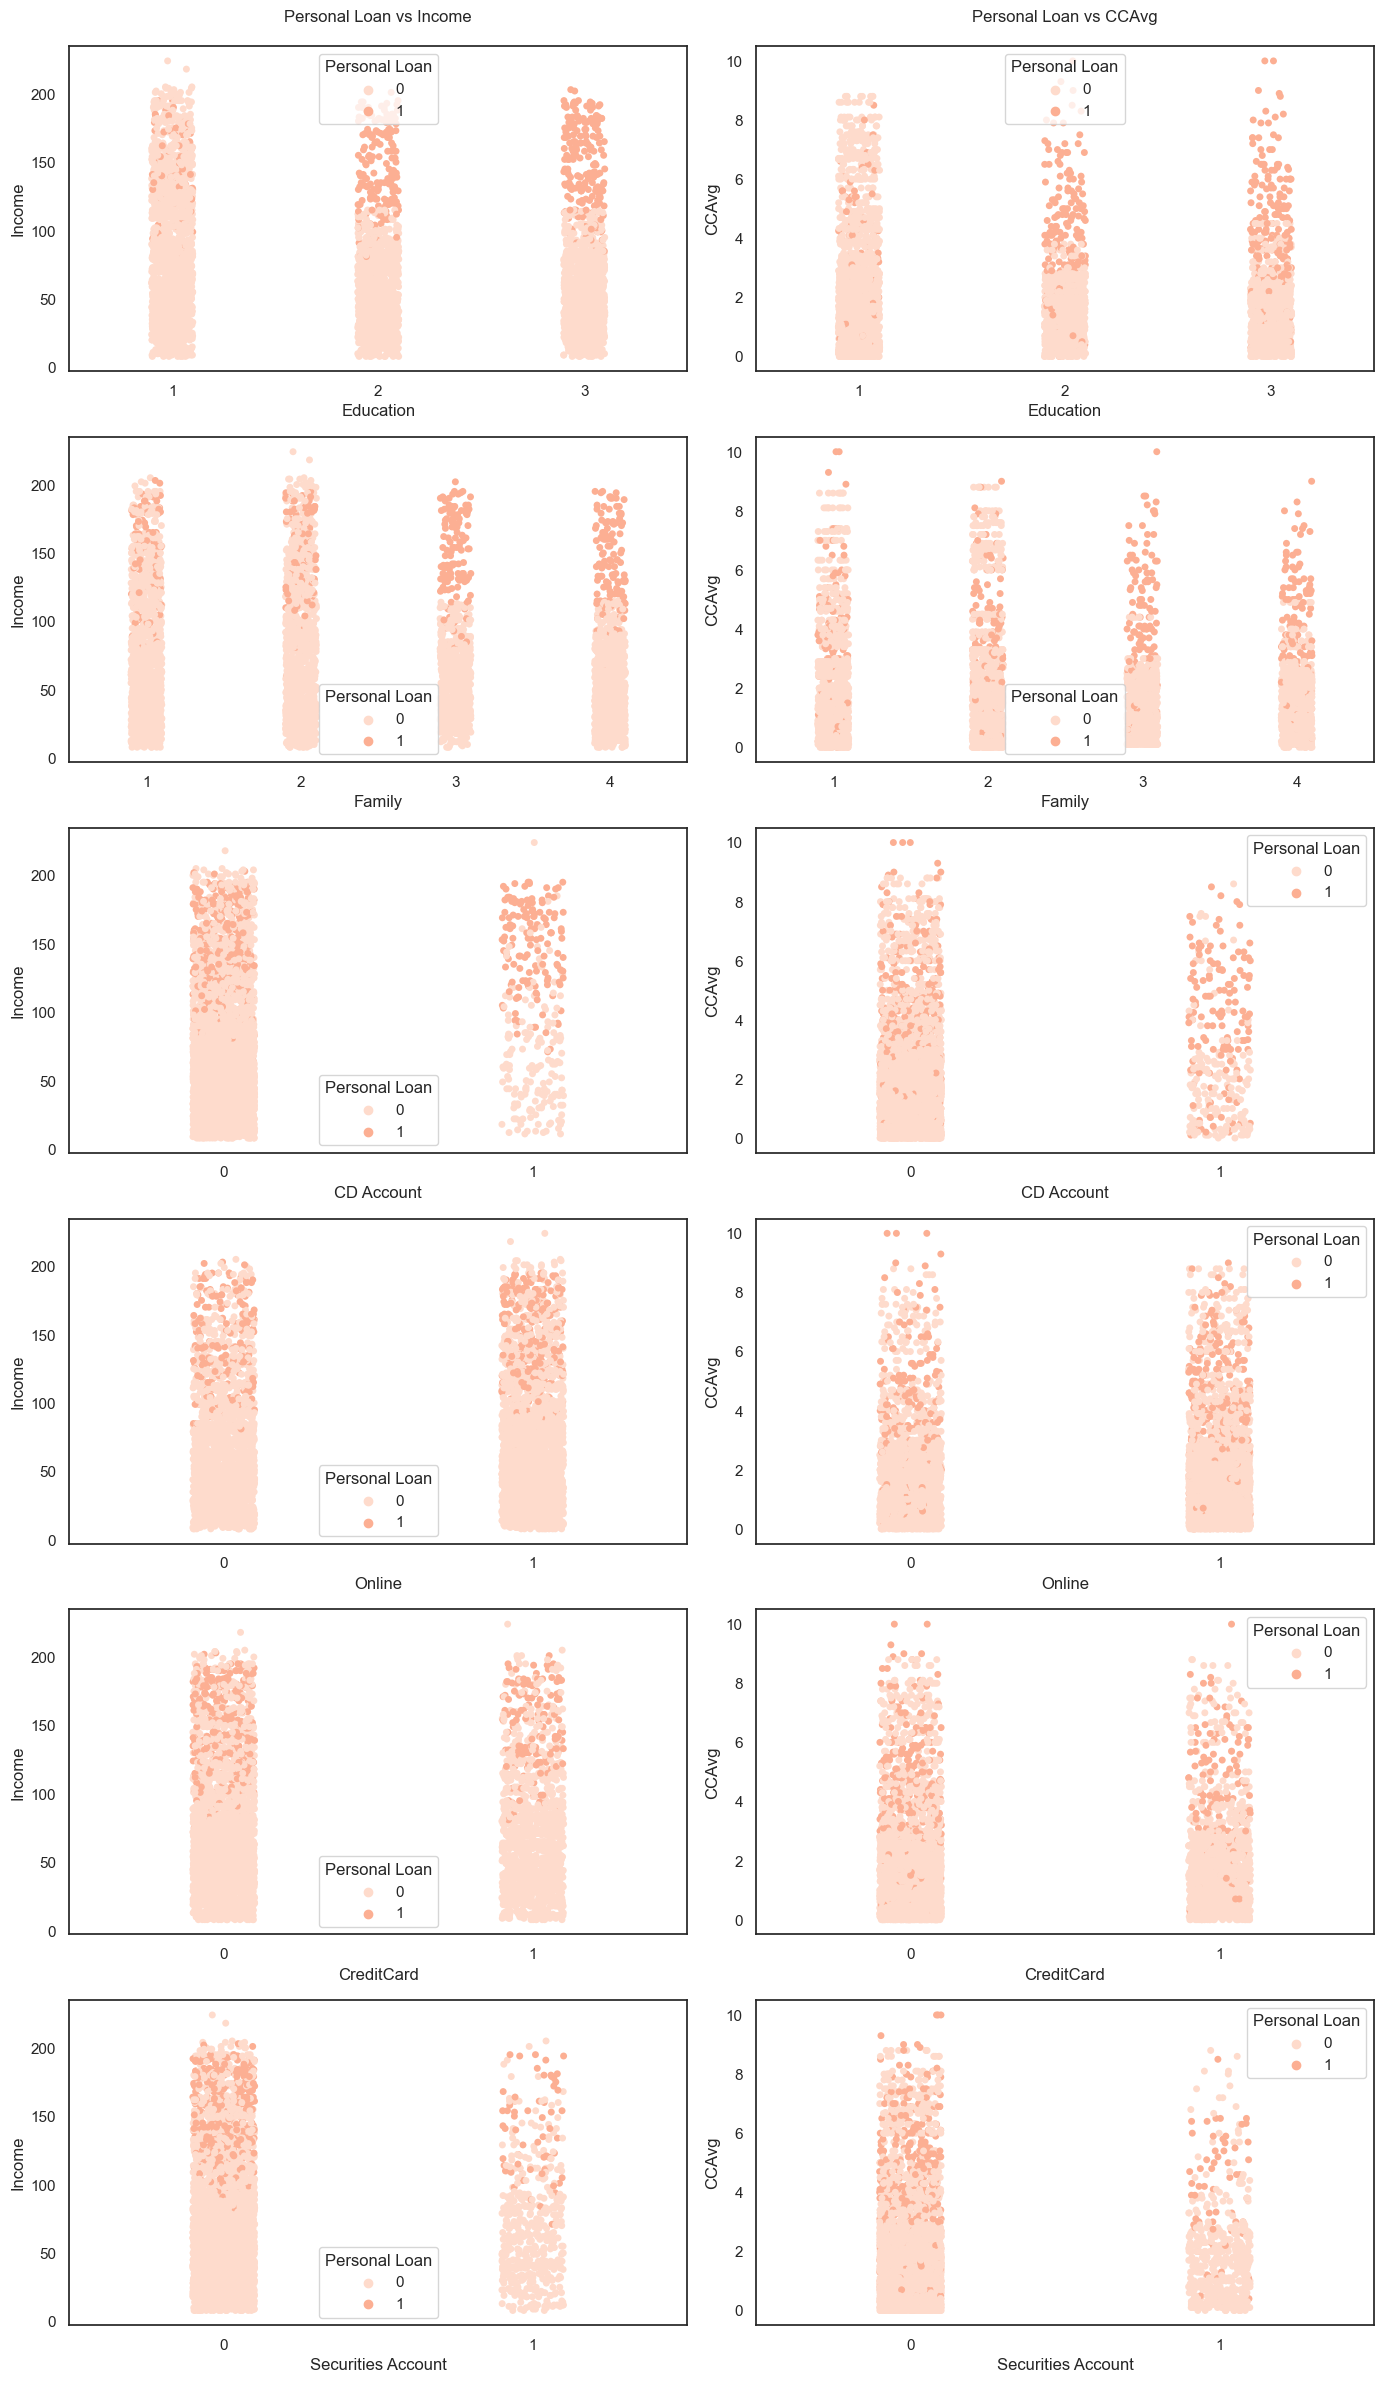

In [452]:
sns.set_palette("Reds")
fig, ax = plt.subplots(6,2,figsize=(14,24))
sns.stripplot(data=df, x='Education', y='Income', hue='Personal Loan', ax=ax[0,0] )
sns.stripplot(data=df, x='Education', y='CCAvg', hue='Personal Loan', ax=ax[0,1])
sns.stripplot(data=df, x='Family', y='Income', hue='Personal Loan', ax=ax[1,0])
sns.stripplot(data=df, x='Family', y='CCAvg', hue='Personal Loan', ax=ax[1,1])
sns.stripplot(data=df, x='CD Account', y='Income', hue='Personal Loan', ax=ax[2,0])
sns.stripplot(data=df, x='CD Account', y='CCAvg', hue='Personal Loan', ax=ax[2,1])
sns.stripplot(data=df, x='Online', y='Income', hue='Personal Loan', ax=ax[3,0])
sns.stripplot(data=df, x='Online', y='CCAvg', hue='Personal Loan', ax=ax[3,1])
sns.stripplot(data=df, x='CreditCard', y='Income', hue='Personal Loan', ax=ax[4,0])
sns.stripplot(data=df, x='CreditCard', y='CCAvg', hue='Personal Loan', ax=ax[4,1])
sns.stripplot(data=df, x='Securities Account', y='Income', hue='Personal Loan', ax=ax[5,0])
sns.stripplot(data=df, x='Securities Account', y='CCAvg', hue='Personal Loan', ax=ax[5,1])
ax[0,0].set_title('Personal Loan vs Income',y=1.05)
ax[0,1].set_title('Personal Loan vs CCAvg',y=1.05)
plt.tight_layout()
plt.show()

All customers with of more than$10 thousand and with Education level 2 or 3, accepted Personal Loans.

All customers with CCAvg of more than $5 thousand and with Education level 2 or 3, accepted Personal Loans.

All customers with Income of more than $10 thousand and Family 3 or 4, accepted Personal Loans.

All customers with CCAvg of more than $5 thousand and by Family 3 or 4, accepted Personal Loans.

Most customers with Income of more than $10 thousand and by CD Account 1, accepted Personal Loans.

Most customers with CCAvg of more than $5 thousand and by CD Account 1, accepted Personal Loans.

********************************************

In [453]:
df1=df
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


*******************************

#  Feature Selection 

In [454]:
X = df1.drop('Personal Loan', axis = 1)    #set X with all feature except Personal Loan
Y = df1[['Personal Loan']]                 #set y with our target feature Personal Loan

# Train Test Split

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

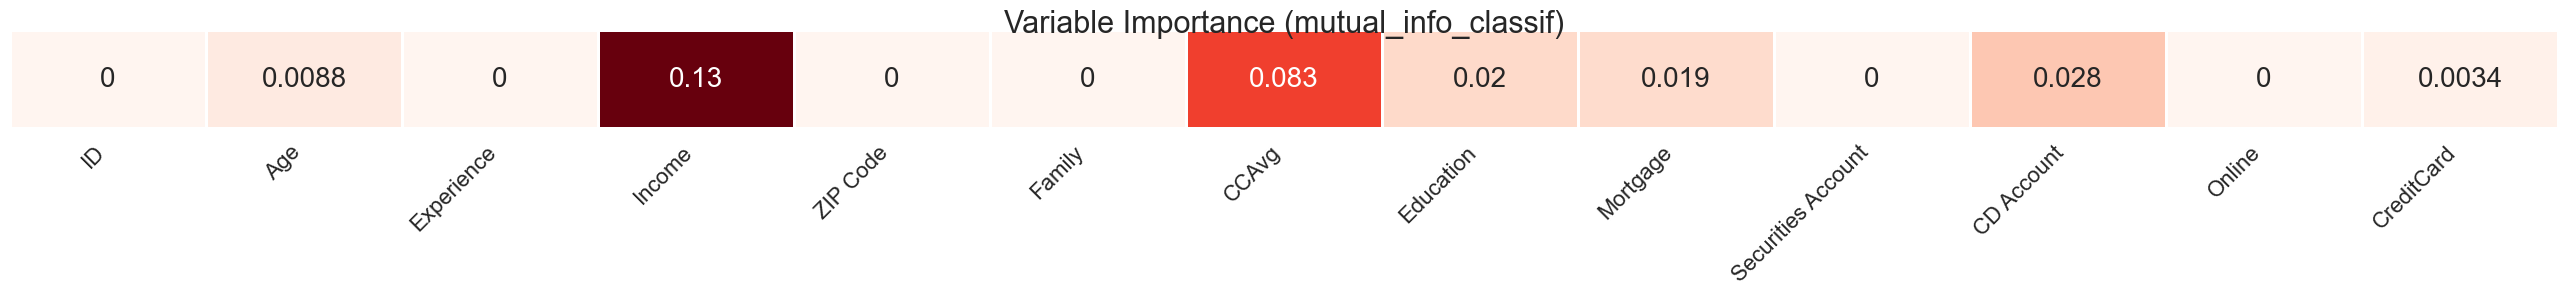

In [456]:
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Reds', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Text(0.5, 0, 'Feature Importance')

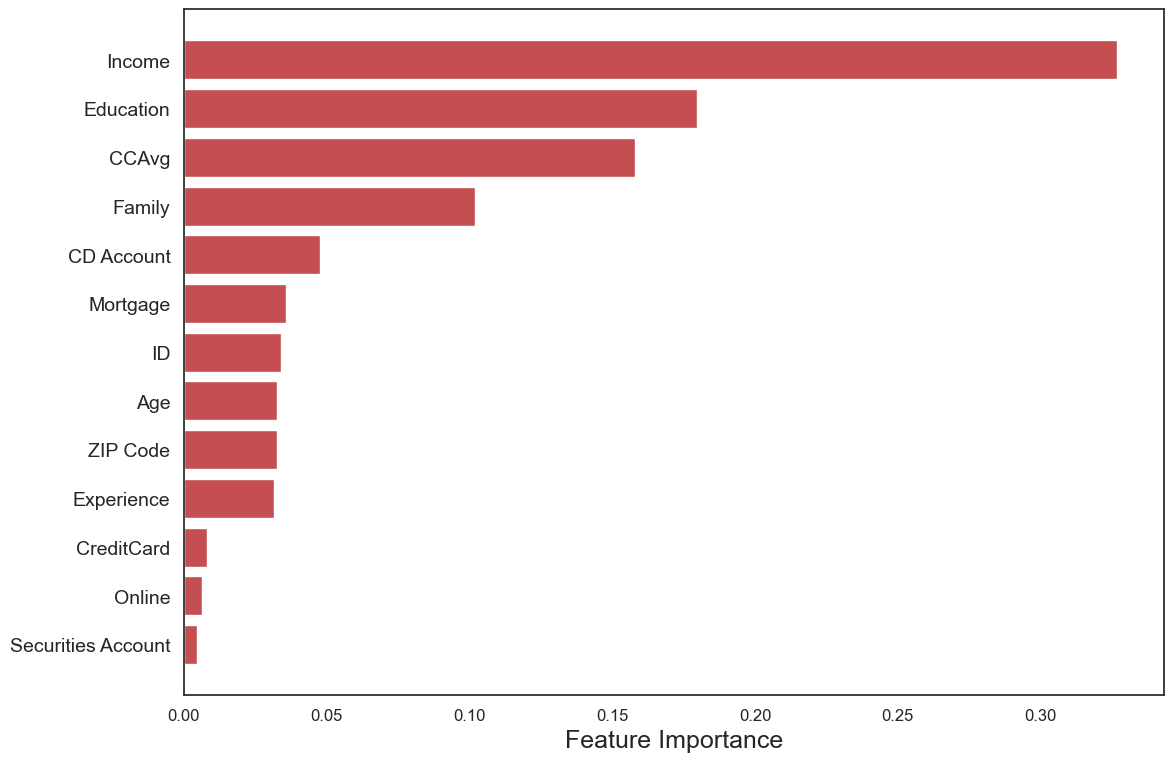

In [457]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize = 18)

most Imortant features on dataset (Income, CCAvg, CD Account)

# Model Building

In [458]:
df1 = df1.drop(['ID','ZIP Code'], axis=1) #dropped not important feaures

In [459]:
df1.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0


# Scaling Dataset

sing standard scaling to scale unbalanced ranges in value

In [460]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df1.drop('Personal Loan',axis=1))

In [461]:
scaled_df=pd.DataFrame(scaled_df)

In [462]:
scaled_df.columns=df1.drop('Personal Loan',axis=1).columns
scaled_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774184,-1.717593,-0.538475,1.397827,-0.193531,-1.048893,-0.555597,2.928588,-0.253567,-1.216414,-0.645095
1,-0.029423,-0.117993,-0.864366,0.526321,-0.250753,-1.048893,-0.555597,2.928588,-0.253567,-1.216414,-0.645095
2,-0.552851,-0.473460,-1.364065,-1.216692,-0.536867,-1.048893,-0.555597,-0.341461,-0.253567,-1.216414,-0.645095
3,-0.901803,-1.006660,0.569554,-1.216692,0.435920,0.141980,-0.555597,-0.341461,-0.253567,-1.216414,-0.645095
4,-0.901803,-1.095526,-0.625379,1.397827,-0.536867,0.141980,-0.555597,-0.341461,-0.253567,-1.216414,1.550160


*****************

# Logistic Regression (LR)


In [463]:
LR= LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [464]:
y_pred_LR= LR.predict(X_test)

In [465]:
print(metrics.accuracy_score(y_test, y_pred_LR))

0.91


In [466]:
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)

[[878  26]
 [ 64  32]]


In [467]:
y_pred_LR= LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       904
           1       0.55      0.33      0.42        96

    accuracy                           0.91      1000
   macro avg       0.74      0.65      0.68      1000
weighted avg       0.90      0.91      0.90      1000



<AxesSubplot: >

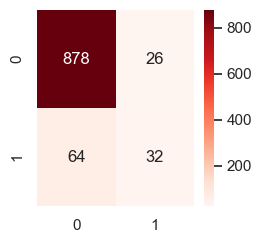

In [468]:
sns.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True,fmt='',cmap='Reds')

# KNN algorithem

In [469]:
kclf = KNeighborsClassifier(n_neighbors=5)

In [470]:
kclf.fit(X_train,y_train)

KNeighborsClassifier()

In [471]:
y_pred_KNN= kclf.predict(X_test)

In [472]:
print(metrics.accuracy_score(y_test, y_pred_KNN))

0.902


In [473]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)

[[901   3]
 [ 95   1]]


In [474]:
y_pred_KNN= kclf.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       904
           1       0.25      0.01      0.02        96

    accuracy                           0.90      1000
   macro avg       0.58      0.50      0.48      1000
weighted avg       0.84      0.90      0.86      1000



<AxesSubplot: >

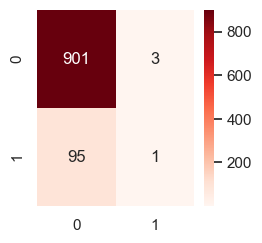

In [475]:
sns.heatmap(confusion_matrix(y_test,y_pred_KNN),annot=True,fmt='',cmap='Reds')

# Gaussian Naive Bayes (GNB)

In [476]:
from sklearn.naive_bayes import GaussianNB

In [477]:
GNB = GaussianNB()

In [478]:
GNB = GaussianNB()

In [479]:
GNB.fit(X_train,y_train)

GaussianNB()

In [480]:
y_pred_GNB= GNB.predict(X_test)

In [481]:
print(metrics.accuracy_score(y_test, y_pred_GNB))

0.906


In [482]:
cm_GNB = confusion_matrix(y_test, y_pred_GNB)
print(cm_GNB)

[[845  59]
 [ 35  61]]


In [483]:
y_pred_GNB= GNB.predict(X_test)
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       904
           1       0.51      0.64      0.56        96

    accuracy                           0.91      1000
   macro avg       0.73      0.79      0.76      1000
weighted avg       0.92      0.91      0.91      1000



<AxesSubplot: >

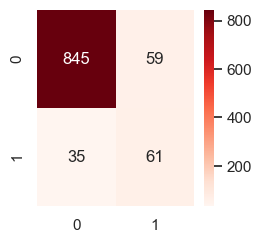

In [484]:
sns.heatmap(confusion_matrix(y_test,y_pred_GNB),annot=True,fmt='',cmap='Reds')

# Random Forest (RF)

In [485]:
RF= RandomForestClassifier(n_estimators=500, random_state=0)

In [486]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [487]:
y_pred_RF= RF.predict(X_test)

In [488]:
print(metrics.accuracy_score(y_test, y_pred_RF))

0.985


In [489]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

[[902   2]
 [ 13  83]]


In [490]:
y_pred_RF= RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.98      0.86      0.92        96

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



<AxesSubplot: >

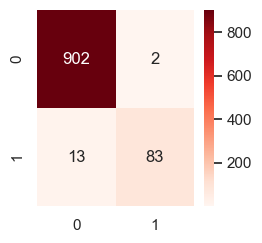

In [491]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True,fmt='',cmap='Reds')

# Visualization RF Model

In [498]:
x_visual = df.drop('Personal Loan', axis=1)
y_visual = df['Personal Loan'].values.reshape(-1,1)

In [500]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


# Prediction Sample Data

In [508]:
# fit final model on all of data (train + test)
RF_model = RF
RF_model.fit(x_visual, y_visual)

# define sample data
sample = pd.DataFrame({'ID':[5071],'Age':[42], 'Experience':[16], 'Income':[30], 'ZIP Code':[92037], 'Family':[3], 'CCAvg':[1.2], 'Education':[3], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[0], 'Online':[1], 'CreditCard':[1],})
print(f"ID: {sample['ID'].values[0]}\n"
      f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"ZIP Code: {sample['ZIP Code'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predict sample data
result = final_model.predict(sample)

print('='*38)
print(f"0:No & 1:Yes: result is :{result}")

ID: 5071
Age: 42
Experience: 16
Income: 30
ZIP Code: 92037
Family: 3
CCAvg: 1.2
Education: 3
Mortgage: 0
Securities Account: 1
CD Account: 0
Online: 1
CreditCard: 1

0:No & 1:Yes: result is :[0]
